<a href="https://colab.research.google.com/github/Sk0108/AI_Project/blob/main/AIProject2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Project: Crime Analysis**

**Phase 1**: *Importing Government dataset and analysis of data avalaible*

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load the CSV file, specifying the correct path
# If the file is in the same directory as your notebook:
file_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Display the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print(df.head())
print(df.info())


Dataset shape: (9397, 33)
         STATE/UT   DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH   ADILABAD  2013      96                 72   
1  ANDHRA PRADESH  ANANTAPUR  2013     156                149   
2  ANDHRA PRADESH   CHITTOOR  2013      72                 61   
3  ANDHRA PRADESH   CUDDAPAH  2013      93                107   
4  ANDHRA PRADESH  CYBERABAD  2013     162                123   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         13    61               0   
1                                          3    28               0   
2                                          2    31               0   
3                                          7    19               0   
4                                         16   138               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  \
0          61                      65   
1          28                     110   
2          31                      52  

**Phase-2**: *Performing Exploratory Analysis and analysing basic trends*

In [13]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
file_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
else:
    raise FileNotFoundError(f"File not found: {file_path}")
print("Data Information: ")
data.info()
print("\n Descriptive Statistics: ")
descriptive_stats= data.describe()
print(descriptive_stats)

Dataset loaded successfully.
Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9397 entries, 0 to 9396
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9397 non-null   object
 1   DISTRICT                                             9397 non-null   object
 2   YEAR                                                 9397 non-null   int64 
 3   MURDER                                               9397 non-null   int64 
 4   ATTEMPT TO MURDER                                    9397 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9397 non-null   int64 
 6   RAPE                                                 9397 non-null   int64 
 7   CUSTODIAL RAPE                                       9397 non-null   int64 
 8   OTHER RAPE                    

**Phase-3**: *Data visualization using **Boxplots, Piecharts** and **trend lines** to better understand the patterns and dynamics of crimes in India*

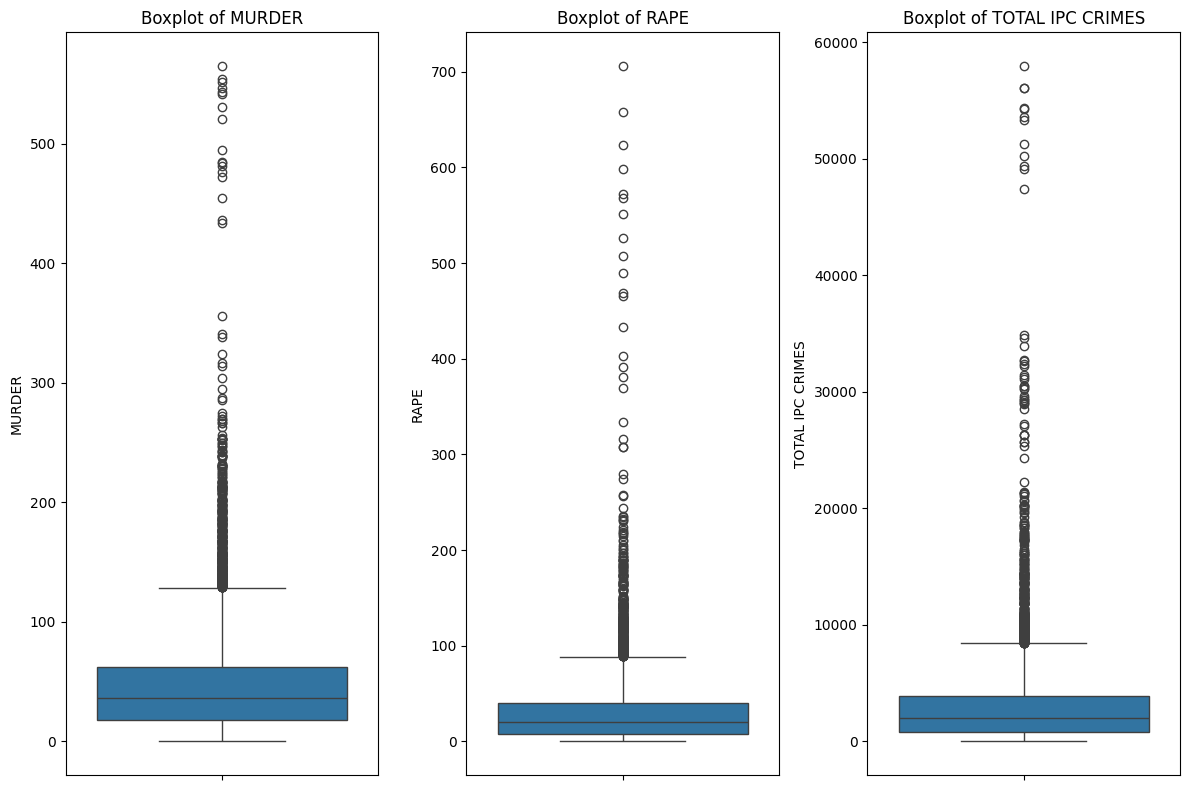

In [14]:
# Visualizing outliers using boxplots for selected columns
columns_of_interest = ['MURDER', 'RAPE', 'TOTAL IPC CRIMES']
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

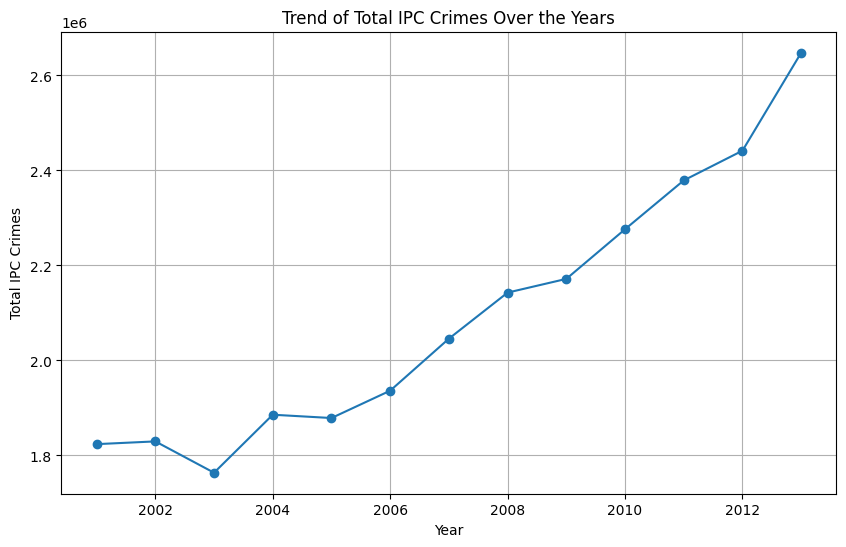

In [15]:
# 2. Yearly Trend of Total IPC Crimes
plt.figure(figsize=(10, 6))
data.groupby('YEAR')['TOTAL IPC CRIMES'].sum().plot(marker='o')
plt.title('Trend of Total IPC Crimes Over the Years')
plt.ylabel('Total IPC Crimes')
plt.xlabel('Year')
plt.grid(True)
plt.show()

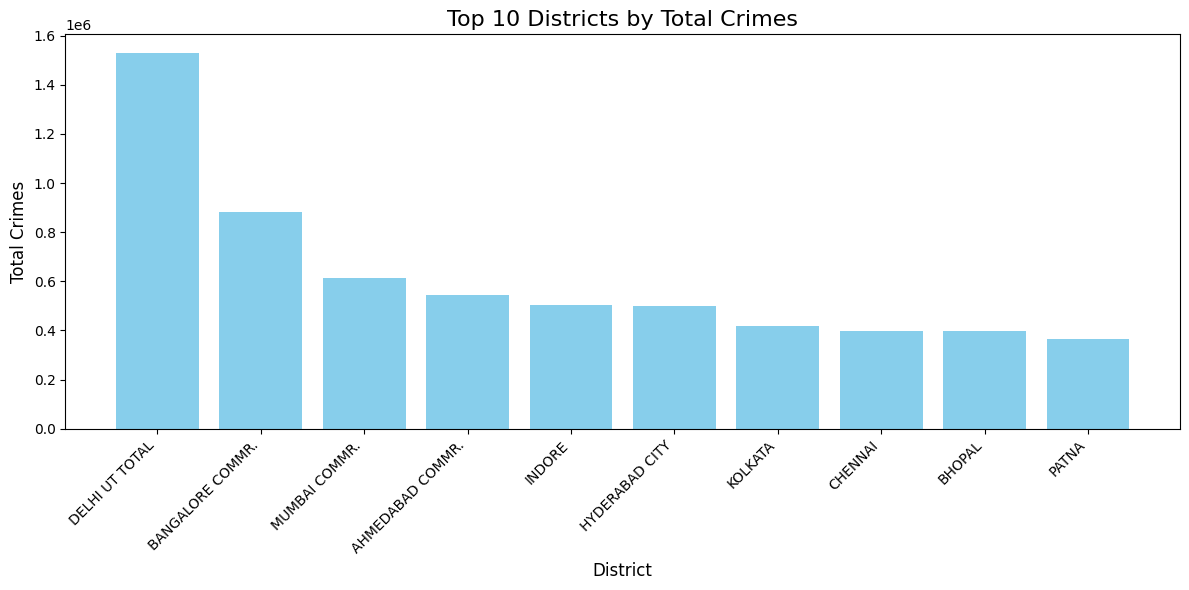

In [16]:
crime_data = data

# Function to plot top 10 districts by total crimes
def top_dus_crimes(crime_data):
    # Drop unnecessary columns for calculation
    remcol = ['STATE/UT', 'DISTRICT', 'YEAR']
    crime_variables = [col for col in crime_data.columns if col not in remcol]

    # Calculate total crimes per district by summing all crime variables
    crime_data['TOTAL_CRIMES'] = crime_data[crime_variables].sum(axis=1)

    # Filter out districts named 'TOTAL' and 'ZZ TOTAL'
    crime_data_filtered = crime_data[~crime_data['DISTRICT'].isin(['TOTAL', 'ZZ TOTAL'])]

    # Group by district and sum the total crimes across years
    district_crime_totals = crime_data_filtered.groupby('DISTRICT')['TOTAL_CRIMES'].sum().reset_index()

    # Sort the data to get the top 10 districts with the highest total crimes
    top_10_districts = district_crime_totals.sort_values(by='TOTAL_CRIMES', ascending=False).head(10)

    # Create bar plot for the top 10 districts
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_districts['DISTRICT'], top_10_districts['TOTAL_CRIMES'], color='skyblue')

    # Add titles and labels
    plt.title('Top 10 Districts by Total Crimes', fontsize=16)
    plt.xlabel('District', fontsize=12)
    plt.ylabel('Total Crimes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Call the function to plot the top 10 districts by total crimes
top_dus_crimes(crime_data)

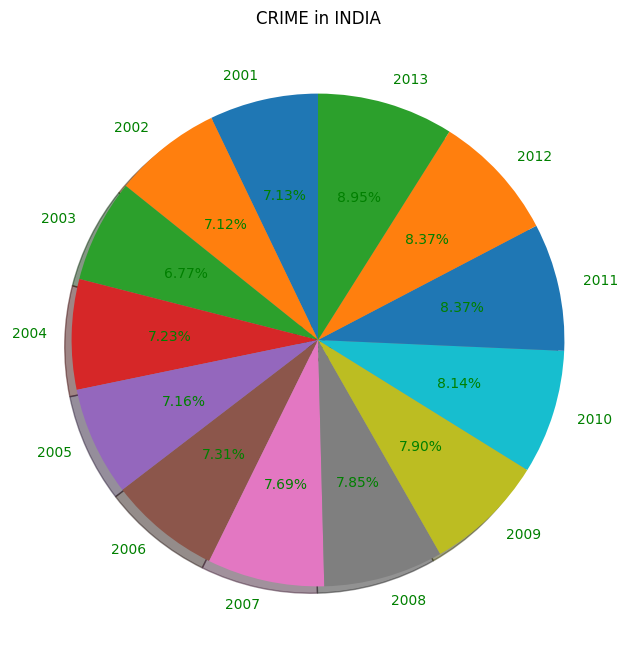

In [17]:
import matplotlib.pyplot as plt


state_mean = data.groupby('YEAR')['TOTAL IPC CRIMES'].mean()

# Create the pie chart
plt.figure(figsize=(15, 8))
plt.pie(state_mean, labels=state_mean.index, startangle=90, shadow=True,
        textprops={'fontsize': 10, 'color': 'green'}, autopct='%0.2f%%')

plt.title('CRIME in INDIA')
plt.show()

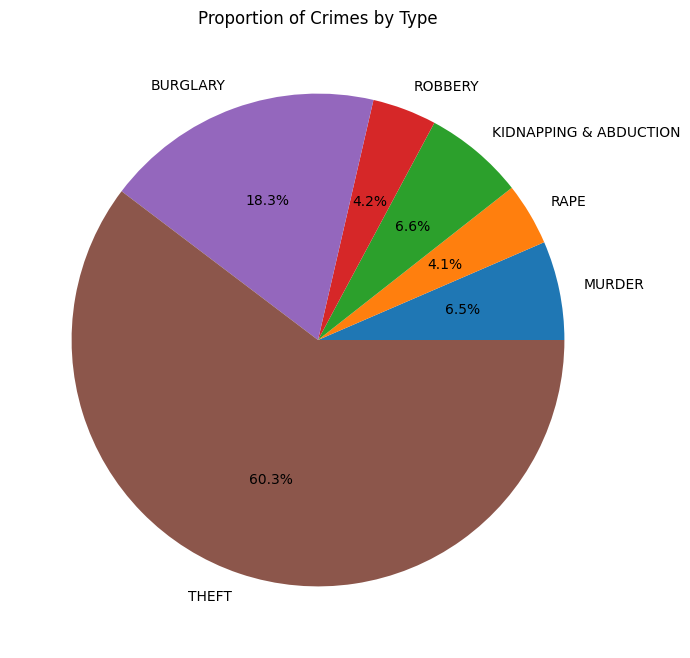

In [18]:
crime_totals = data[['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'ROBBERY', 'BURGLARY', 'THEFT']].sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(crime_totals.values, labels=crime_totals.index, autopct='%1.1f%%')
plt.title('Proportion of Crimes by Type')
plt.show()

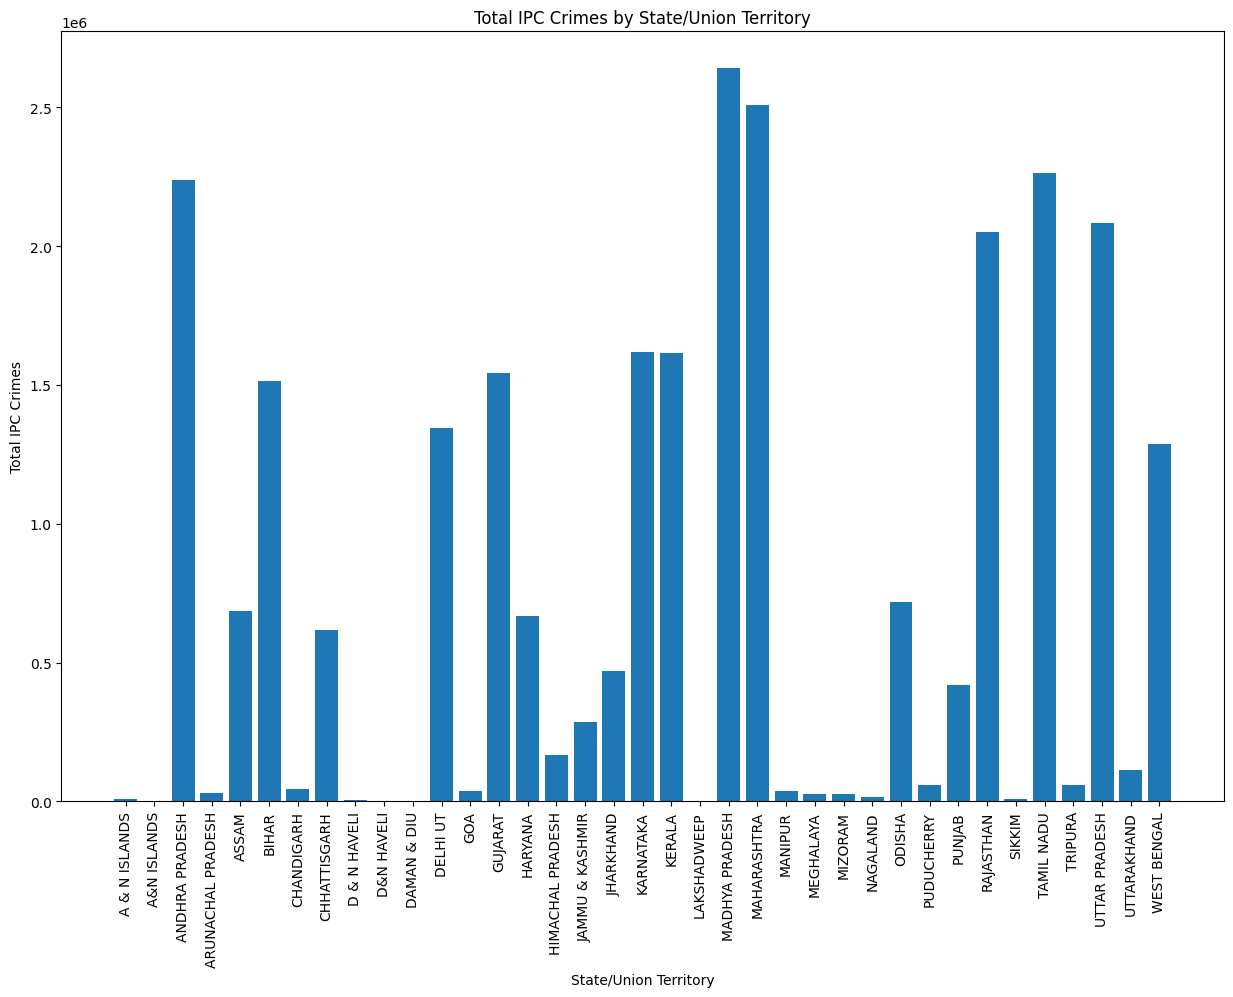

In [19]:
# Group the data by state/union territory and sum the total number of IPC crimes
state_totals = data.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum()

# Create a bar chart
plt.figure(figsize=(15, 10))
plt.bar(state_totals.index, state_totals.values)
plt.xticks(rotation=90)
plt.xlabel('State/Union Territory')
plt.ylabel('Total IPC Crimes')
plt.title('Total IPC Crimes by State/Union Territory')
plt.show()

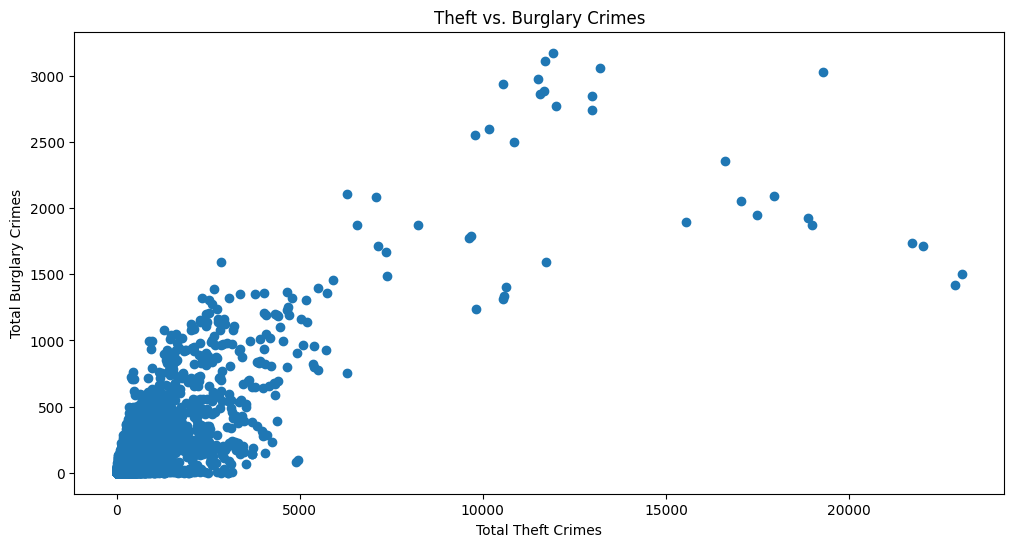

In [20]:
# Create a scatter plot of theft and burglary crimes
plt.figure(figsize=(12, 6))
plt.scatter(data['THEFT'], data['BURGLARY'])
plt.xlabel('Total Theft Crimes')
plt.ylabel('Total Burglary Crimes')
plt.title('Theft vs. Burglary Crimes')
plt.show()

**Phase-4**: *Statistical Analysis of Crime Data*

In [26]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import statistics
import scipy.stats as stats
file_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'
if os.path.exists(file_path):
    crime = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
else:
    raise FileNotFoundError(f"File not found: {file_path}")
print("\n Descriptive Statistics: ")
descriptive_stats= crime.describe()
print(descriptive_stats)

Dataset loaded successfully.

 Descriptive Statistics: 
              YEAR       MURDER  ATTEMPT TO MURDER  \
count  9397.000000  9397.000000        9397.000000   
mean   2007.168884    47.030861          41.786847   
std       3.755781    45.666528          53.614888   
min    2001.000000     0.000000           0.000000   
25%    2004.000000    18.000000          10.000000   
50%    2007.000000    36.000000          27.000000   
75%    2010.000000    62.000000          54.000000   
max    2013.000000   565.000000         741.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  CUSTODIAL RAPE  \
count                                9397.000000  9397.000000     9397.000000   
mean                                    5.201341    29.718846        0.002873   
std                                    10.039063    37.168683        0.076455   
min                                     0.000000     0.000000        0.000000   
25%                                     0.000000    

In [25]:
crime_modified = crime.iloc[:, 2:]
crime_modified.mean()

,0
YEAR,2007.168884
MURDER,47.030861
ATTEMPT TO MURDER,41.786847
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,5.201341
RAPE,29.718846
CUSTODIAL RAPE,0.002873
OTHER RAPE,29.715973
KIDNAPPING & ABDUCTION,47.611046
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,35.270618
KIDNAPPING AND ABDUCTION OF OTHERS,12.340428


In [27]:
crime_modified.median()

,0
YEAR,2007.0
MURDER,36.0
ATTEMPT TO MURDER,27.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,2.0
RAPE,20.0
CUSTODIAL RAPE,0.0
OTHER RAPE,20.0
KIDNAPPING & ABDUCTION,25.0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,18.0
KIDNAPPING AND ABDUCTION OF OTHERS,5.0


In [28]:
crime_modified['TOTAL IPC CRIMES'].mean()

2896.834095988081

In [29]:
crime_modified.mode()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,248


**InterQuartile Range**

In [30]:
numeric_data = crime_modified.select_dtypes(exclude='object')
for col in numeric_data.columns:
    Q1 = crime_modified[col].quantile(.25)
    Q3 = crime_modified[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of YEAR : 6
IQR of MURDER : 44
IQR of ATTEMPT TO MURDER : 44
IQR of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER : 6
IQR of RAPE : 32
IQR of CUSTODIAL RAPE : 0
IQR of OTHER RAPE : 32
IQR of KIDNAPPING & ABDUCTION : 46
IQR of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS : 36
IQR of KIDNAPPING AND ABDUCTION OF OTHERS : 11
IQR of DACOITY : 7
IQR of PREPARATION AND ASSEMBLY FOR DACOITY : 2
IQR of ROBBERY : 29
IQR of BURGLARY : 137
IQR of THEFT : 349
IQR of AUTO THEFT : 120
IQR of OTHER THEFT : 230
IQR of RIOTS : 105
IQR of CRIMINAL BREACH OF TRUST : 22
IQR of CHEATING : 87
IQR of COUNTERFIETING : 3
IQR of ARSON : 16
IQR of HURT/GREVIOUS HURT : 456
IQR of DOWRY DEATHS : 14
IQR of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY : 66
IQR of INSULT TO MODESTY OF WOMEN : 12
IQR of CRUELTY BY HUSBAND OR HIS RELATIVES : 120
IQR of IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES : 0
IQR of CAUSING DEATH BY NEGLIGENCE : 165
IQR of OTHER IPC CRIMES : 1290
IQR of TOTAL IPC CRIMES : 3036


In [31]:
crime_modified.corr()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,1.000000,-0.058564,0.003433,-0.025945,0.117192,-0.003173,0.117208,0.139400,0.188757,0.036546,-0.095927,0.019487,0.053627,-0.032378,0.030964,0.078344,-0.018321,-0.010335,0.028702,0.101922,0.030062,-0.027253,0.015672,0.027423,0.099288,-0.014320,0.137120,-0.019891,0.131168,0.057802,0.061502
MURDER,-0.058564,1.000000,0.697122,0.504745,0.567113,0.043717,0.567066,0.574875,0.559306,0.517560,0.514519,0.319137,0.530815,0.517783,0.564367,0.521111,0.545705,0.364860,0.541802,0.463213,0.356911,0.204793,0.424389,0.692987,0.431519,0.301118,0.470499,0.090900,0.502127,0.470959,0.643455
ATTEMPT TO MURDER,0.003433,0.697122,1.000000,0.393557,0.453365,0.035019,0.453328,0.467756,0.472738,0.391571,0.324725,0.280558,0.444413,0.406470,0.443495,0.413334,0.425114,0.294538,0.438173,0.430494,0.309683,0.173980,0.413769,0.583334,0.424348,0.245892,0.401721,0.086188,0.364182,0.424010,0.556045
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,-0.025945,0.504745,0.393557,1.000000,0.342023,0.009230,0.342030,0.397432,0.418994,0.303687,0.162245,0.266969,0.210154,0.117830,0.267185,0.267189,0.238481,0.219784,0.373104,0.217178,0.161814,0.018432,0.080672,0.547724,0.193298,0.142075,0.379016,0.064050,0.158588,0.216834,0.290788
RAPE,0.117192,0.567113,0.453365,0.342023,1.000000,0.038373,0.999998,0.657844,0.683972,0.518682,0.220755,0.352423,0.428226,0.503069,0.577785,0.552546,0.540204,0.264195,0.431955,0.443327,0.278357,0.175018,0.407337,0.446875,0.700139,0.209905,0.624883,0.031364,0.347918,0.519457,0.658661
CUSTODIAL RAPE,-0.003173,0.043717,0.035019,0.009230,0.038373,1.000000,0.036319,0.018398,0.017048,0.017989,0.059303,0.020925,0.033824,0.019773,0.017785,0.012088,0.021401,0.018916,0.026246,0.015970,0.008299,0.008396,0.018008,0.007712,0.004182,0.006565,0.022080,-0.002685,0.044348,0.005443,0.019779
OTHER RAPE,0.117208,0.567066,0.453328,0.342030,0.999998,0.036319,1.000000,0.657856,0.683989,0.518685,0.220650,0.352407,0.428189,0.503067,0.577793,0.552564,0.540202,0.264176,0.431934,0.443329,0.278362,0.175014,0.407332,0.446894,0.700185,0.209908,0.624886,0.031372,0.347853,0.519485,0.658671
KIDNAPPING & ABDUCTION,0.139400,0.574875,0.467756,0.397432,0.657844,0.018398,0.657856,1.000000,0.968231,0.908145,0.220407,0.282916,0.441635,0.397787,0.723096,0.784299,0.586055,0.172000,0.518203,0.514806,0.289239,0.097031,0.226139,0.510923,0.422205,0.179045,0.501593,0.025906,0.306529,0.467180,0.635569
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.188757,0.559306,0.472738,0.418994,0.683972,0.017048,0.683989,0.968231,1.000000,0.774605,0.188779,0.287194,0.406641,0.378717,0.678868,0.730360,0.555999,0.185917,0.536882,0.498969,0.284325,0.104115,0.231247,0.519604,0.448525,0.177281,0.559434,0.006140,0.332930,0.472797,0.628354
KIDNAPPING AND ABDUCTION OF OTHERS,0.036546,0.517560,0.391571,0.303687,0.518682,0.017989,0.518685,0.908145,0.774605,1.000000,0.241390,0.234719,0.436165,0.372017,0.692262,0.760846,0.551373,0.123752,0.411766,0.466652,0.255513,0.071097,0.184787,0.422282,0.316901,0.156029,0.332000,0.055239,0.217868,0.390014,0.555463


<Axes: >

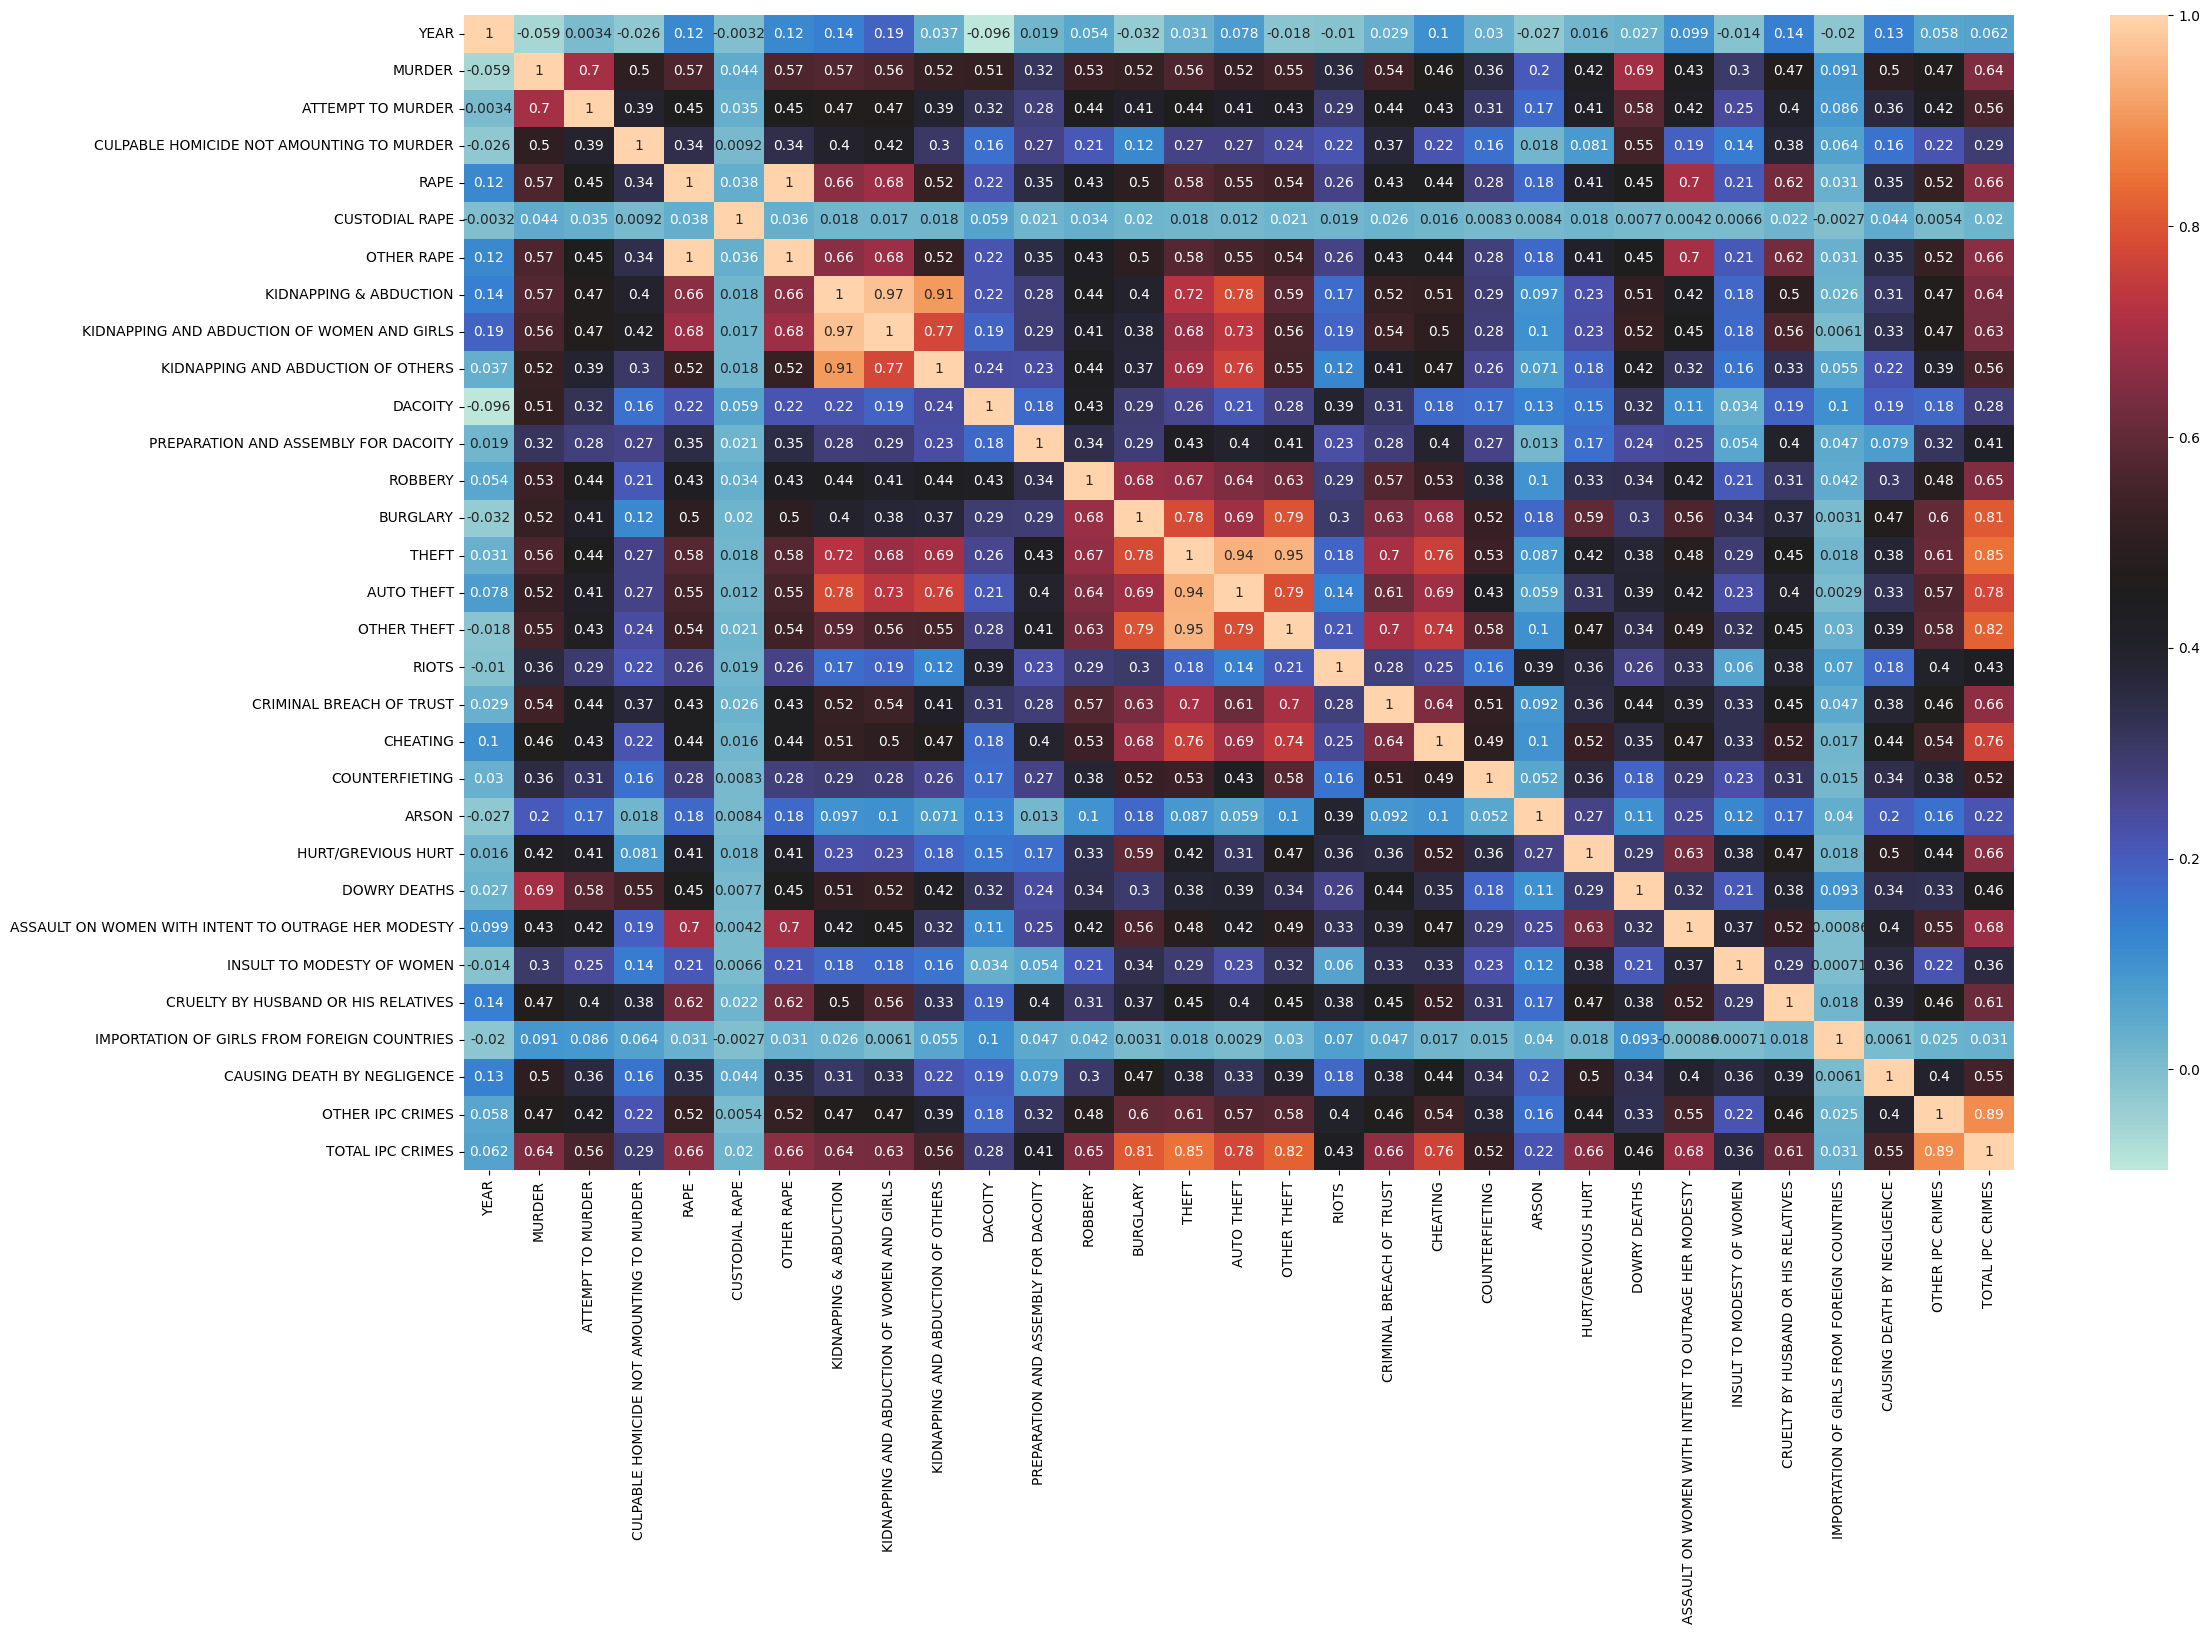

In [32]:
plt.figure(figsize=(25,15))
sns.heatmap(crime_modified.corr(),annot=True,cmap='icefire')

# **T Test**
The aim of the T-test is to determine if there was a significant difference in theft rates between Arunachal Pradesh and all other states combined. This analysis helps evaluate whether Arunachal Pradesh’s theft rates deviate from the national average.

In [33]:
from scipy.stats import ttest_ind

state = 'ARUNACHAL PRADESH'
state_thefts = crime[crime['STATE/UT']==state]['THEFT']
other_thefts = crime[crime['STATE/UT']!=state]['THEFT']

t_stat, p_val = ttest_ind(state_thefts, other_thefts)

print("State:", state)
print("t-statistic:", t_stat)
print("p-value:", p_val)
print()
if p_val < 0.05:
    print('Reject null hypothesis - Significant difference found between thefts in', state, 'and all other states combined')
else:
    print('Accept null hypothesis - No significant difference found between thefts in', state, 'and all other states combined')

State: ARUNACHAL PRADESH
t-statistic: -5.640167186526789
p-value: 1.7480293283197756e-08

Reject null hypothesis - Significant difference found between thefts in ARUNACHAL PRADESH and all other states combined


Phase-5: Geospatial Analysis

In [37]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

geojson_path = '/content/drive/My Drive/AIProjectDatabase/india (1).geojson'  # Adjust path if needed
india_geo = gpd.read_file(geojson_path)

# Inspect the loaded GeoDataFrame structure
print("GeoDataFrame Columns:", india_geo.columns)

# Extract the latitude and longitude from the geometry
india_geo['latitude'] = india_geo.geometry.centroid.y
india_geo['longitude'] = india_geo.geometry.centroid.x

# Extract relevant columns for merging (adjust based on your crime data)
geo_coordinates = india_geo[['district', 'latitude', 'longitude']]

#  2: Load the crime dataset
crime_data_path = '/content/drive/My Drive/AIProjectDatabase/crimes_cleaned.csv'  # Adjust path if needed
crime_data = pd.read_csv(crime_data_path)

# Ensure district names match by cleaning up whitespace and cases
crime_data['DISTRICT'] = crime_data['DISTRICT'].str.strip().str.lower()
geo_coordinates['district'] = geo_coordinates['district'].str.strip().str.lower()

#  3: Merge crime data with geo coordinates on district names
merged_data = crime_data.merge(geo_coordinates, left_on='DISTRICT', right_on='district', how='left')

# Check for any rows with missing latitude or longitude
missing_coords = merged_data[merged_data[['latitude', 'longitude']].isnull().any(axis=1)]
print("Rows with missing coordinates after merge:")
print(missing_coords[['DISTRICT', 'latitude', 'longitude']].head())

# Drop rows with missing coordinates (if any)
merged_data = merged_data.dropna(subset=['latitude', 'longitude'])



#  Convert to GeoDataFrame for visualization
gdf = gpd.GeoDataFrame(
    merged_data,
    geometry=gpd.points_from_xy(merged_data.longitude, merged_data.latitude),
    crs="EPSG:4326"
)

GeoDataFrame Columns: Index(['id', 'district', 'dt_code', 'st_nm', 'st_code', 'year', 'geometry'], dtype='object')
Rows with missing coordinates after merge:
         DISTRICT  latitude  longitude
3        cuddapah       NaN        NaN
4       cyberabad       NaN        NaN
6   guntakal rly.       NaN        NaN
8    guntur urban       NaN        NaN
9  hyderabad city       NaN        NaN
